In [1]:
import pickle
blocks = pickle.load(open('data/uniques_75923_16_16_3.torch.tensor.pickle', 'rb'))
blocks.shape

torch.Size([75923, 16, 16, 3])

In [2]:
import torch
import numpy as np

asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3
asymmetric = asymmetric / 16 / 16 / 3 / 255
encodings = blocks.view(-1, 16*16*3).float() @ asymmetric
sorted_ = sorted(zip(encodings, blocks.view(-1, 16*16, 3).numpy()), key=lambda x: x[0])
sorted_ = np.stack([block for encoding, block in sorted_])
sorted_[0].shape

(256, 3)

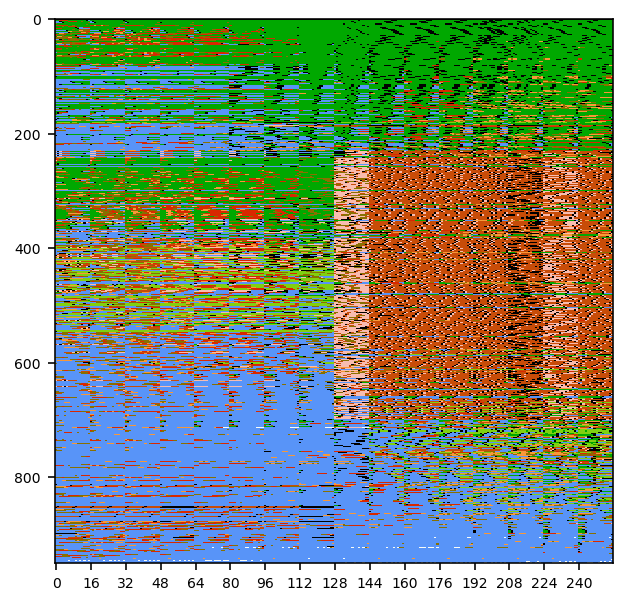

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(sorted_[::80], aspect='auto')
ax.set_xticks(ticks=range(0, 16*16, 16))
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);

In [4]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(blocks.reshape(-1, 16*16*3))

PCA(n_components=3)

In [5]:
all_X, all_Y, all_Z = pca.transform(blocks.reshape(-1, 16*16*3)).T[:3]
(np.min(all_X), np.max(all_X)), (np.min(all_Y), np.max(all_Y)),  (np.min(all_Z), np.max(all_Z))

((-1653.1226798385012, 2280.6900470360592),
 (-1306.2888540626896, 1849.7466072792645),
 (-1345.0539487951864, 2515.170084650703))

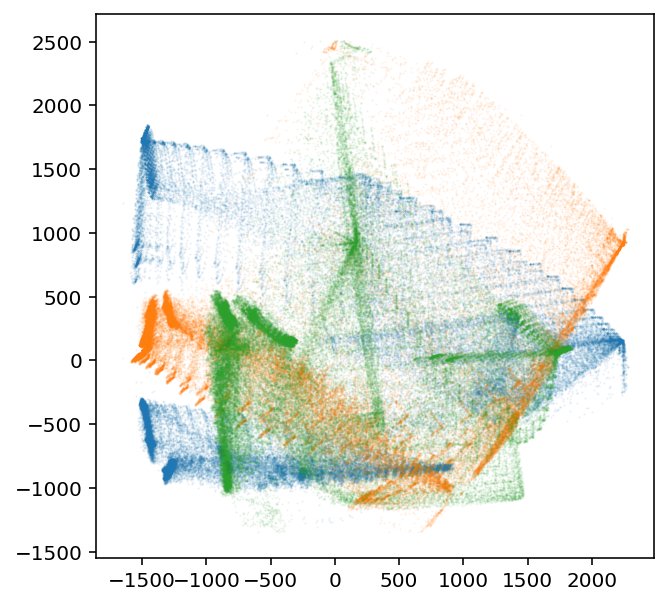

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

all_X, all_Y, all_Z = pca.transform(blocks.reshape(-1, 16*16*3)).T[:3]
ax.scatter(all_X, all_Y, lw=0, alpha=0.1, s=1);
ax.scatter(all_X, all_Z, lw=0, alpha=0.1, s=1);
ax.scatter(all_Y, all_Z, lw=0, alpha=0.1, s=1);

In [7]:
import pickle
pickle.dump(pca, open('../interface/models/blocks_75923_3_component.sklearn.decomposition.PCA.pickle', 'wb'))

In [ ]:
ls -al ../interface/models/blocks_75923_3_component.sklearn.decomposition.PCA.pickle